# Guía 5: Acumulación de evidencia (2/2)

# Toma de decisiones 2020

## Guillermo Solovey

En esta guía vamos a trabajar con los resultados del experimento “dot density metacognition” en el que ustedes participaron. Si alguno no lo hizo, es recomendable que lo haga antes de empezar a resolver los ejercicios, en este link

En cada trial del experimento se presentan dos círculos con puntos. La tarea es responder lo mejor posible (y lo antes posible) cuál contiene más puntos y luego reportar la confianza en la decisión en una escala de 1 a 6. En total había 120 trials por participante.

# Ejercicio 1

El primer paso es importar los datos a R y explorar los resultados. Para eso, bajar este archivo csv que contiene los datos de cada trial de todos los alumnos. Luego visualizar el contenido de ‘datos’, reconociendo qué contiene cada columna.


In [2]:
datos <- read.csv('./datos.csv', header=TRUE, sep=",")
# visualizar los datos con 
head(datos)

subject,trial,dots_left,dots_right,correct,rt,confidence
1,1,50,70,FALSE,3312,3
1,2,50,72,FALSE,1701,4
1,3,50,74,FALSE,1588,4
1,4,50,76,TRUE,1086,2
1,5,50,76,FALSE,1706,2
1,6,50,78,TRUE,980,6


# Ejercicio 2

Calcular el porcentaje de respuestas correctas de cada participante.

El experimento está programado para adaptar la dificultad de la tarea a medida que pasan los trials con un método que se llama staircase.

Para explorar cómo se modificaba, seleccionen los datos de uno de los participantes y grafiquen la diferencia de puntos a izquierda y derecha en función del número de trials.

Grafiquen con puntos de color negro los trials correctos y en rojo los trials incorrectos. ¿En qué consiste el staircase?

    # para quedarse con las filas correspondientes al participante 1, por ejemplo:
    d1 <- d[d$subject==1,]


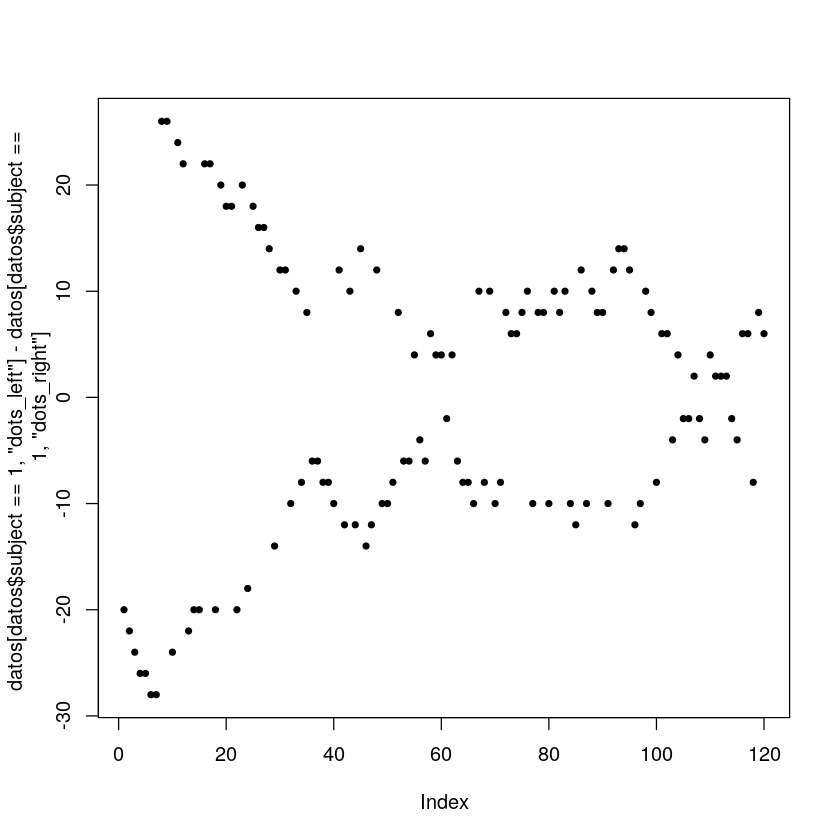

In [3]:
plot(datos[datos$subject==1, 'dots_left'] - datos[datos$subject==1, 'dots_right'], pch=20, col='black')


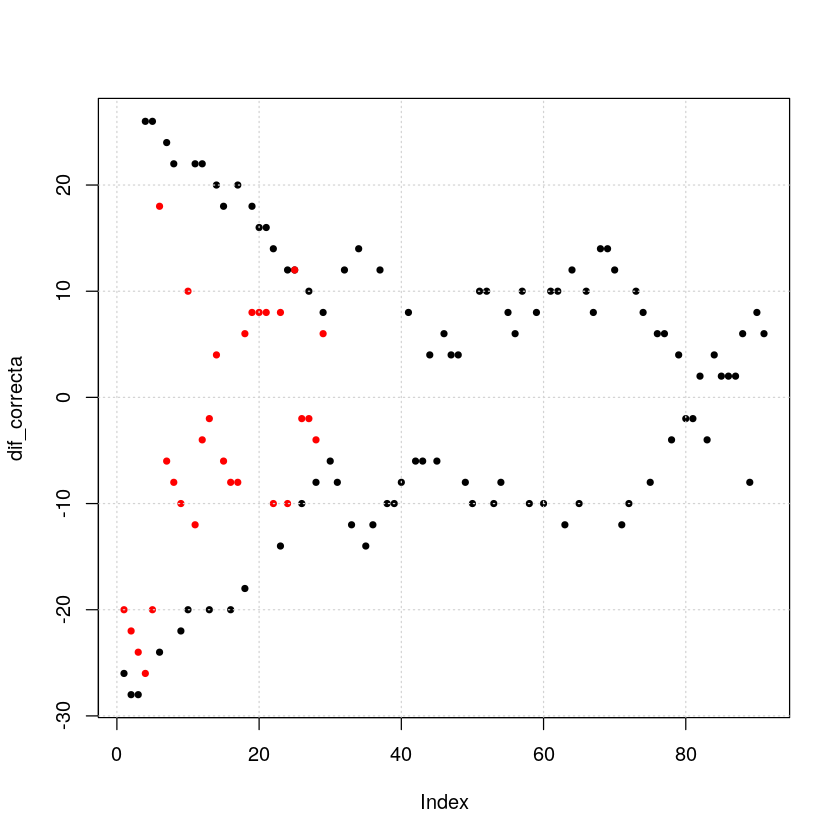

In [4]:
dif_correcta <- datos[datos$subject==1 & datos$correct == T, 'dots_left'] - datos[datos$subject==1 & datos$correct == T, 'dots_right']
dif_incorrecta <- datos[datos$subject==1 & datos$correct == F, 'dots_left'] - datos[datos$subject==1 & datos$correct == F, 'dots_right']
plot(dif_correcta , pch=20, col='black')
points(dif_incorrecta, pch=20, col='red')

grid()

In [5]:
library(ggplot2)
#install.packages("gridExtra")
library(gridExtra)

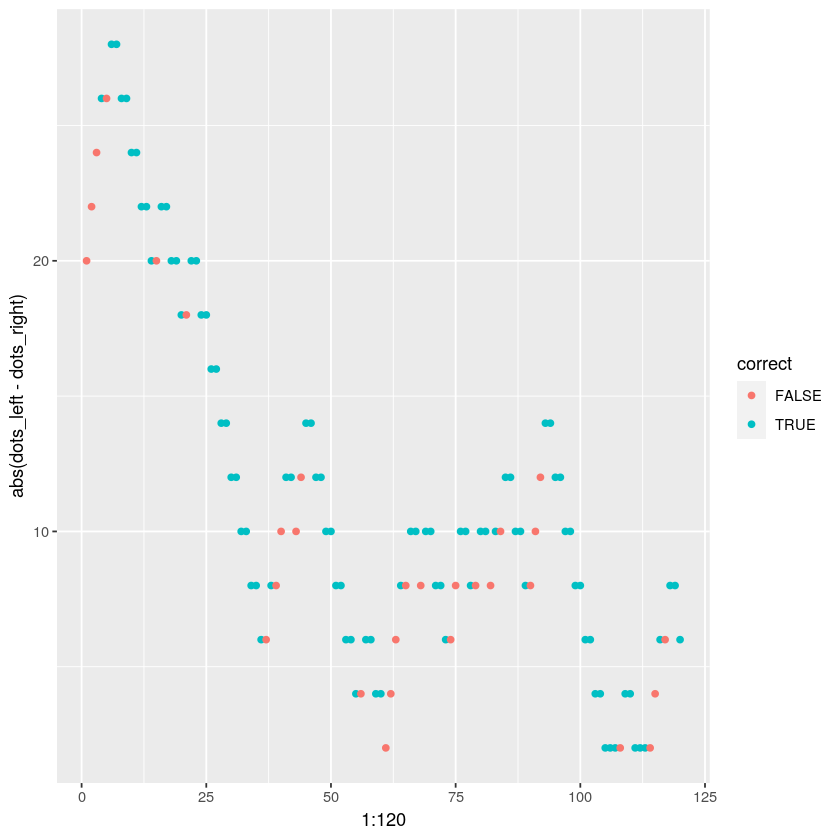

In [6]:
ggplot(datos[datos$subject==1,], aes(x=1:120, y=abs(dots_left-dots_right), col=correct)) + geom_point()

# Ejercicio 3

A partir de ahora restringir el análisis a los últimos N trials, luego de que se llegó a un nivel estable de dificultad.

Establecer un criterio para definir N (¿cuántos trials descartar?).

¿Por qué hacemos esto? Una vez hecho este corte, volver a calcular el porcentaje de respuestas correctas de cada uno.

¿Cambió en algo respecto del cálculo usando todos los trials?

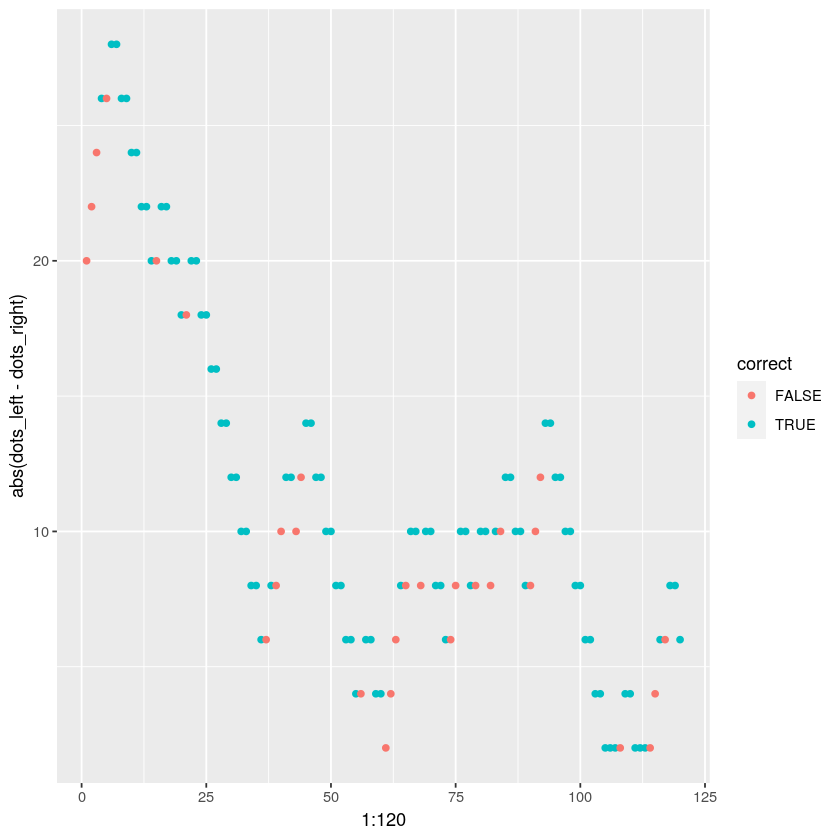

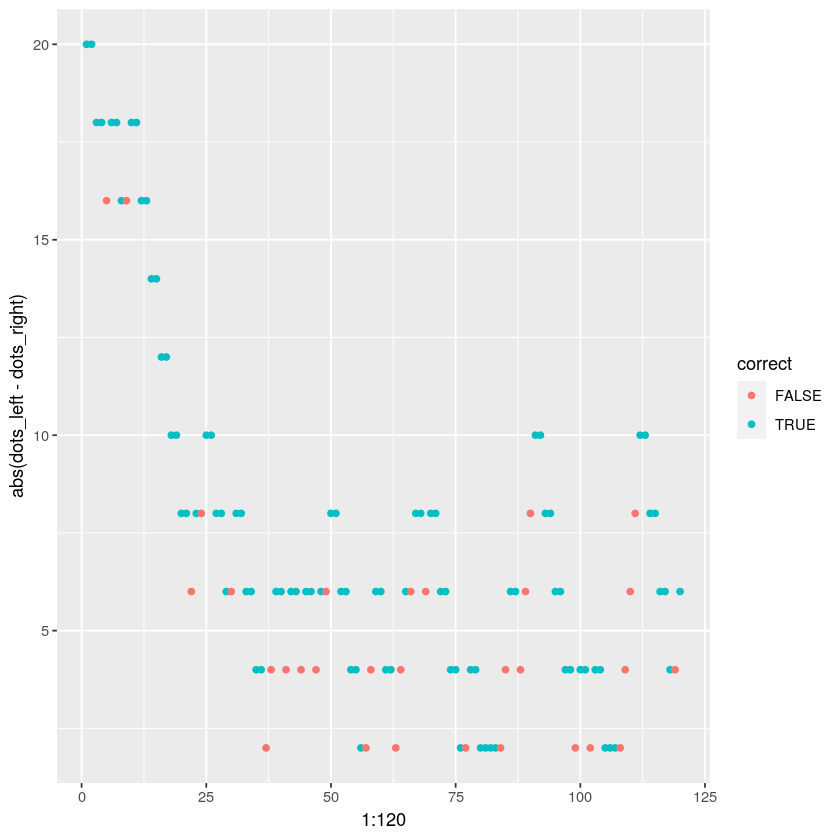

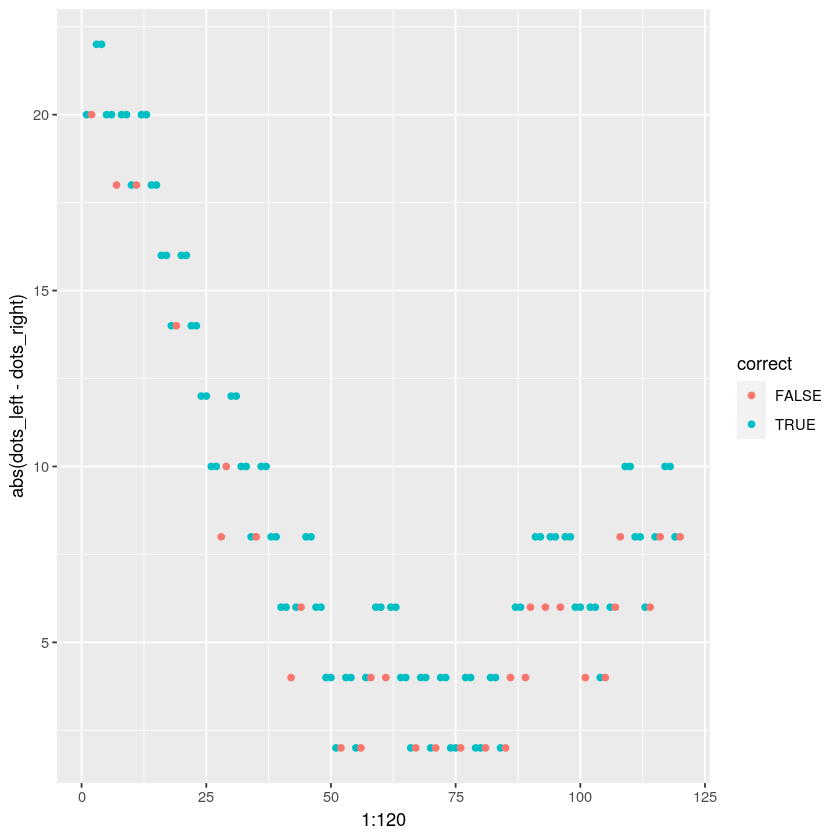

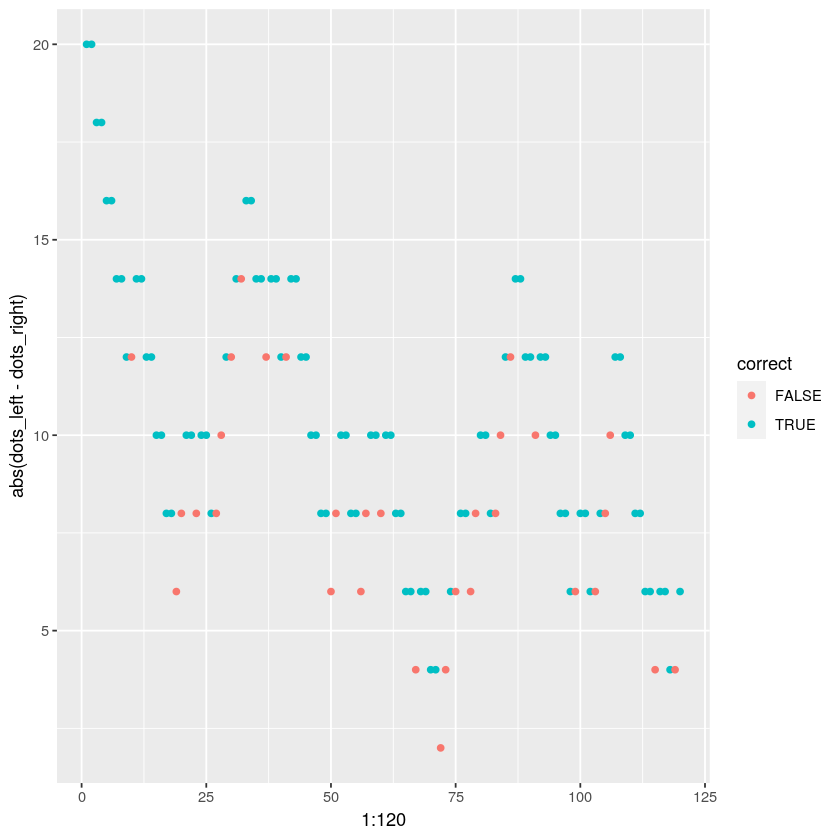

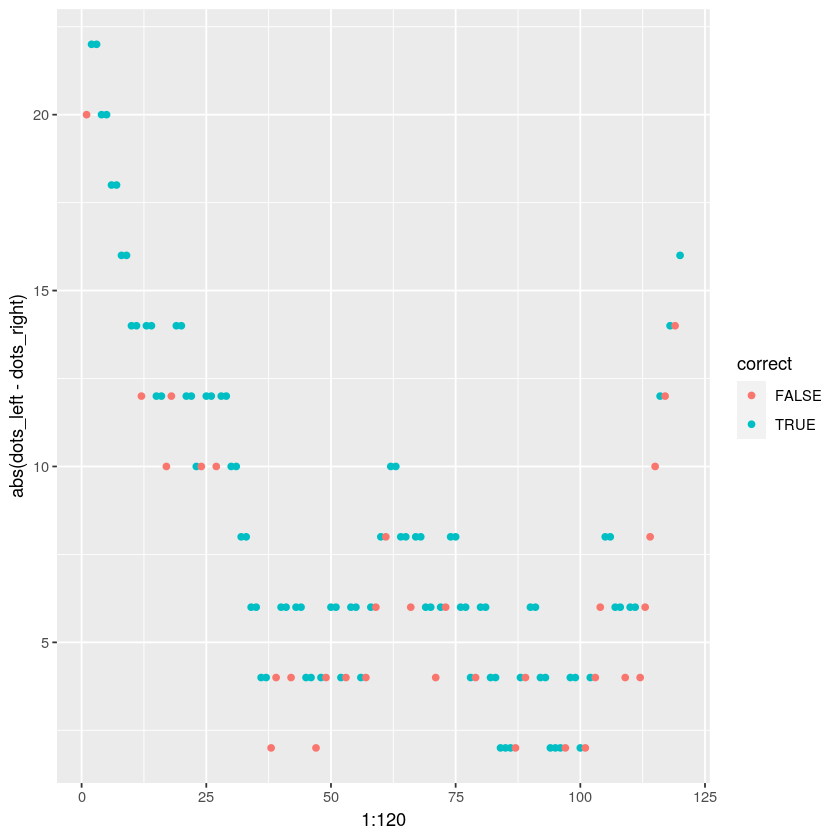

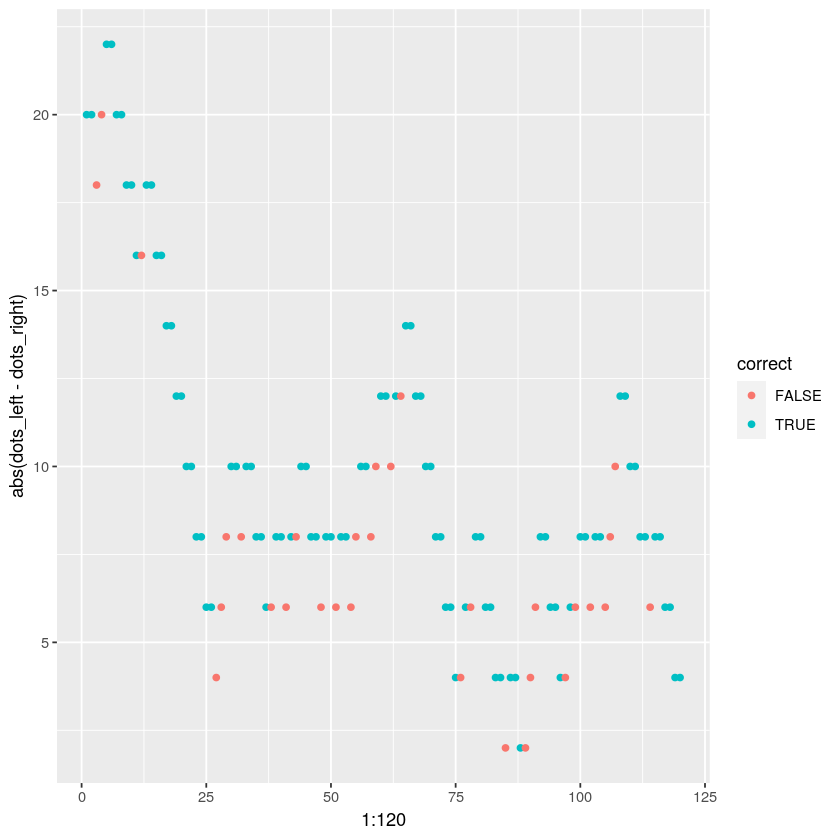

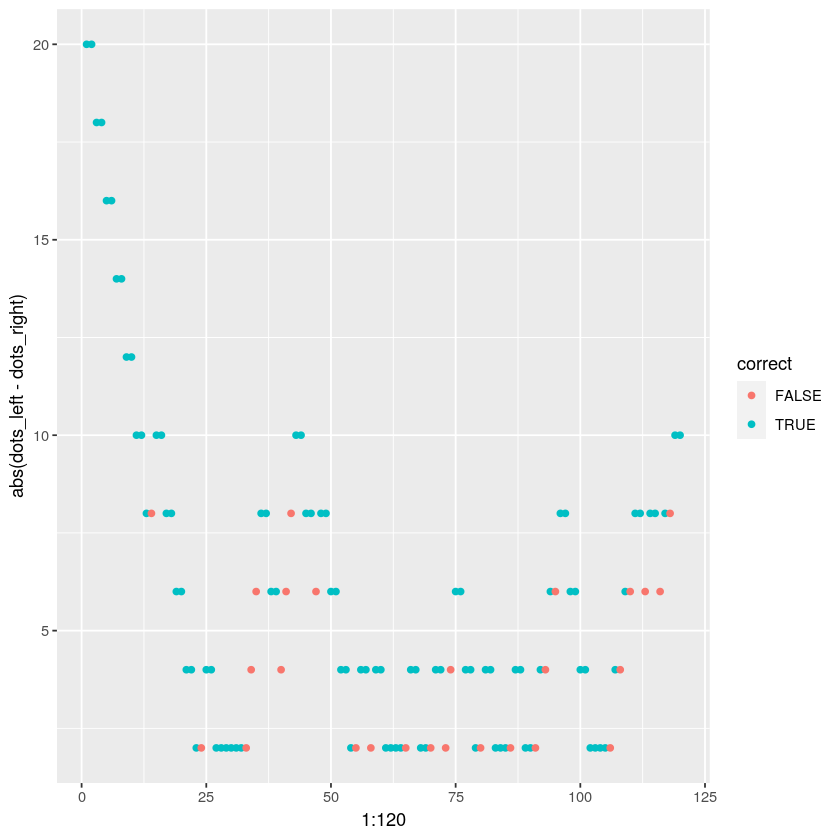

In [7]:
ggplot(datos[datos$subject==1,], aes(x=1:120, y=abs(dots_left-dots_right), col=correct)) + geom_point()
ggplot(datos[datos$subject==2,], aes(x=1:120, y=abs(dots_left-dots_right), col=correct)) + geom_point()
ggplot(datos[datos$subject==3,], aes(x=1:120, y=abs(dots_left-dots_right), col=correct)) + geom_point()
ggplot(datos[datos$subject==4,], aes(x=1:120, y=abs(dots_left-dots_right), col=correct)) + geom_point()
ggplot(datos[datos$subject==5,], aes(x=1:120, y=abs(dots_left-dots_right), col=correct)) + geom_point()
ggplot(datos[datos$subject==6,], aes(x=1:120, y=abs(dots_left-dots_right), col=correct)) + geom_point()
ggplot(datos[datos$subject==7,], aes(x=1:120, y=abs(dots_left-dots_right), col=correct)) + geom_point()

In [8]:
stability.thr <- 50
datos.clean <- datos[datos$trial >= stability.thr, ]
length(datos.clean$trial)


[1] 3834

In [9]:
mean(datos$correct)

[1] 0.754784

In [10]:
mean(datos.clean$correct)

[1] 0.7219614

> El porcentaje de respuestas correctas baja

In [11]:
mean(datos$confidence)

[1] 3.547377

In [12]:
mean(datos.clean$confidence)

[1] 3.468701

# Ejercicio 4

Explorar los tiempos de respuesta de los participantes.

En los datos, los tiempos están en milisegundos.

¿Cuál es el rango de valores de tiempo de respuesta?

Hagan un grafico de los tiempos de respuesta.

¿Hay algún outlier (valor atípico)? Si lo hubiera, restringir los tiempos de respuesta a los menores a 5 segundos.

¿Cuántos datos se descartan con ese criterio?

In [13]:
max(datos$rt)/1000
min(datos$rt)/1000

[1] 163.8094

[1] 0.51367

> Hay tiempos de respuestas desde 513 ms hasta casi 3 minutos.

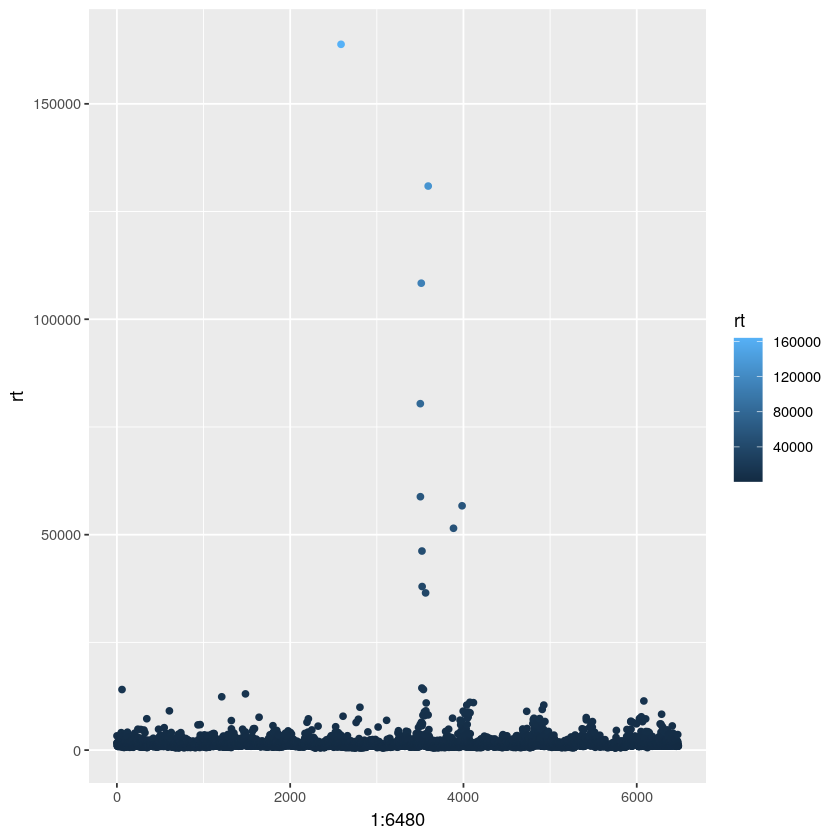

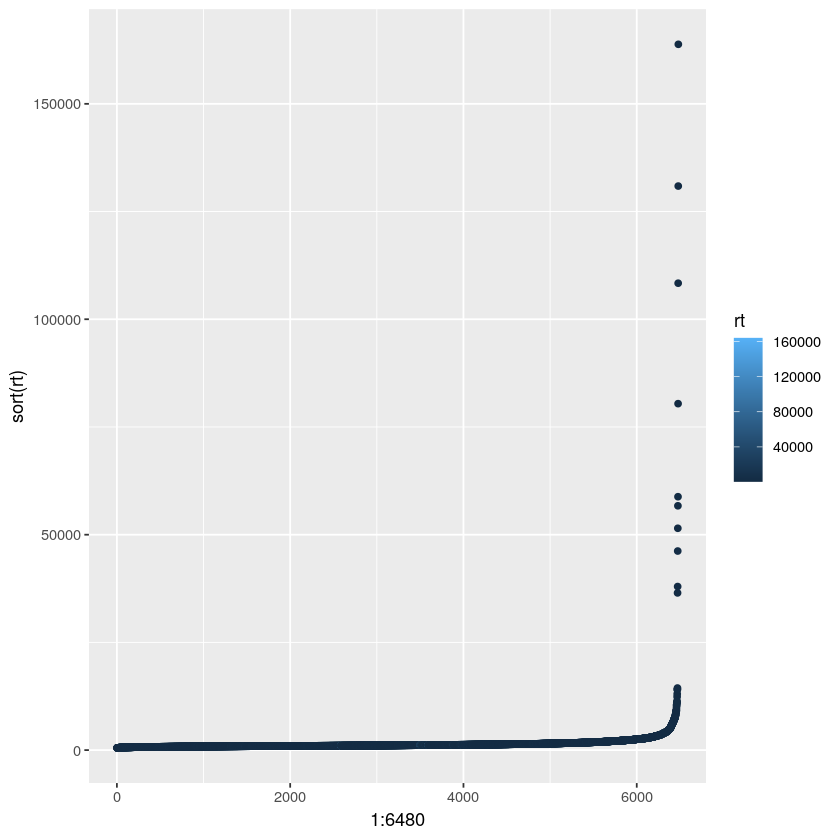

In [14]:
ggplot(datos, aes(x=1:6480, y=rt, col=rt)) + geom_point()
ggplot(datos, aes(x=1:6480, y=sort(rt), col=rt)) + geom_point()

In [15]:
max.rt.thr  <- 5000
datos.clean <- datos[datos$trial >= stability.thr & datos$rt <= max.rt.thr, ]

In [16]:
length(datos$trial) - length(datos.clean$trial)

[1] 2695

> Hay outliers, se descartan 1.368 al establecer 5 segundos como valor máximo

In [17]:
len.data <- length(datos.clean$trial)

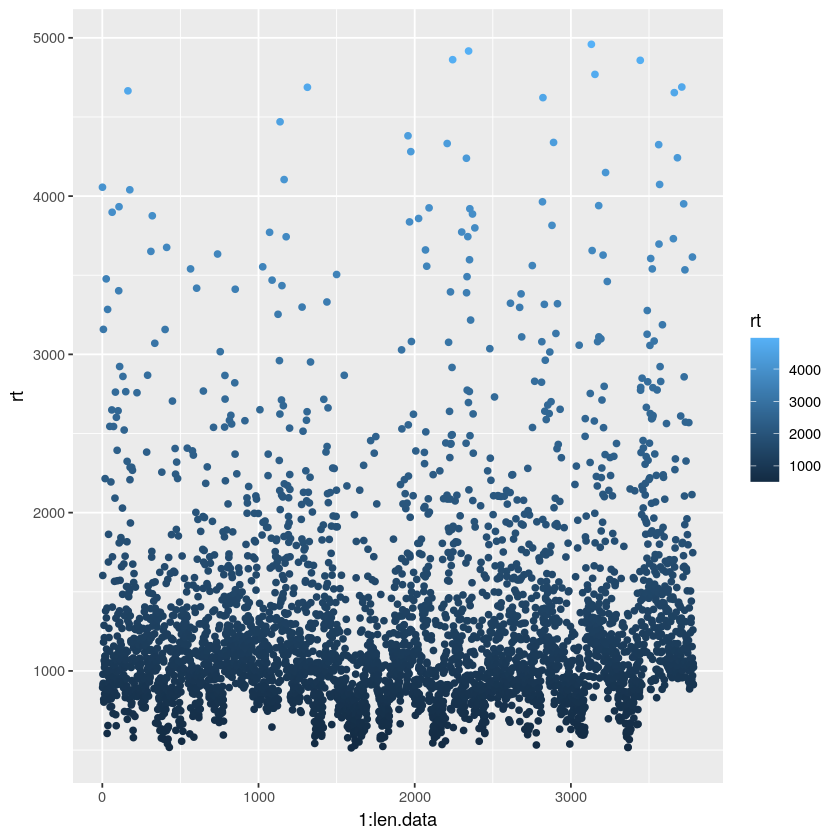

In [18]:
ggplot(datos.clean, aes(x=1:len.data, y=rt, col=rt)) + geom_point()

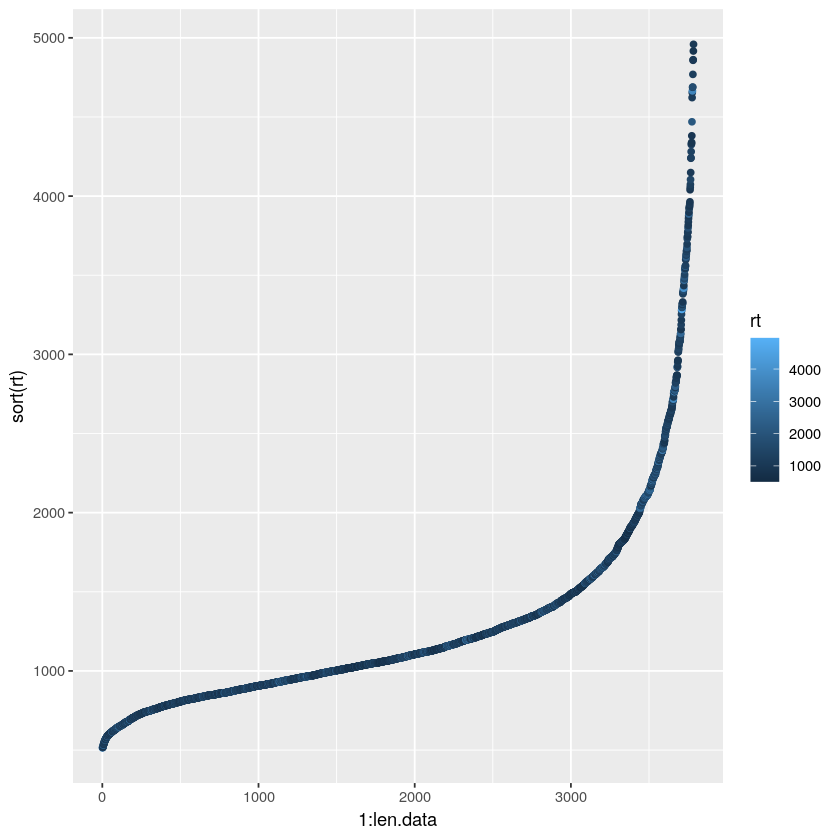

In [19]:
ggplot(datos.clean, aes(x=1:len.data, y=sort(rt), col=rt)) + geom_point()

# Ejercicio 5

Hacer un histograma de los tiempos de respuesta para aciertos y para errores.

¿Son diferentes los tiempos? Mantener la restricción de tiempos definida en el ejercicio anterior.

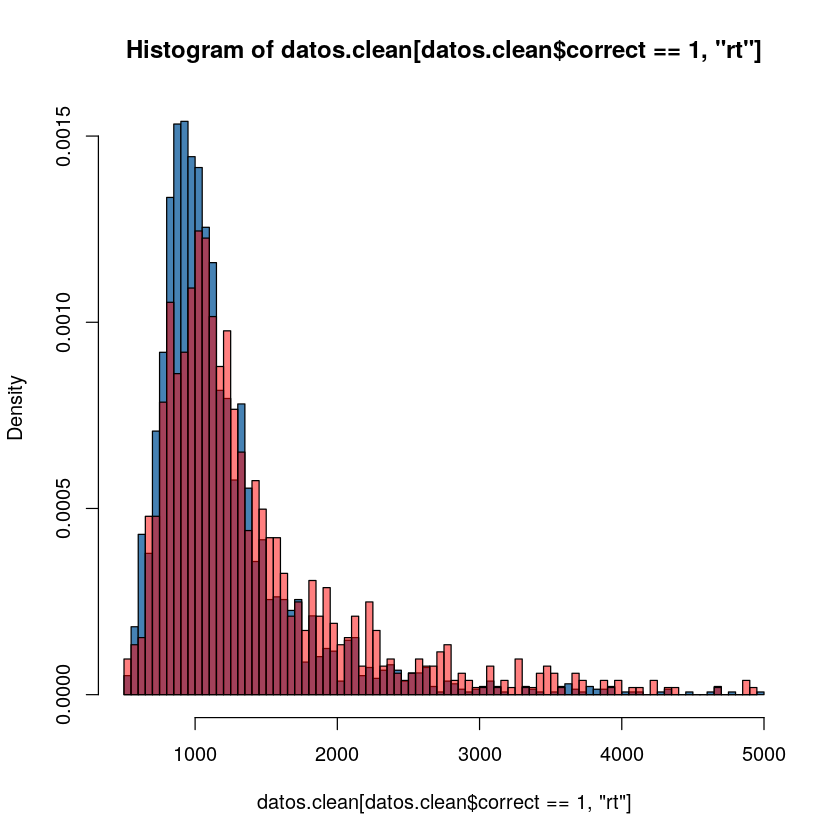

In [20]:
hist(datos.clean[datos.clean$correct==1, 'rt'], breaks=100, col='steelblue', freq=F)
hist(datos.clean[datos.clean$correct==0, 'rt'], breaks=100, col=rgb(1,0,0,0.5), add=T, freq=F)

# Ejercicio 6

Hacer un modelo como los de la guía 4 que describa las distribuciones de tiempo de respuesta experimentales.

Para esto, encontrar parámetros del modelo adecuados (el tiempo de cada paso puede ser 1 milisegundo).

Copio ejercicio 5 de la guia 4

## Ejercicio 5 de Guia 4

Usar la funcion del ejercicio 3 para construir histogramas de los tiempos de respuesta para distintos valores de dificultad.


In [21]:
rw_decisiones <- function(n_pasos=1000, drift=0, sd_rw=1, umbral=10, x_ini=umbral/2, t0=500){
    x  <- x_ini + cumsum( rnorm(n_pasos, mean=drift, sd=sd_rw) )
    td <- which( x < 0 | x  > umbral )[1]
    if(is.na(td)){
        td <- n_pasos
    }
    rt <- t0 + td
    resp <- sign(x[td] - x_ini)
    out <- c(rt, resp)
    return(out)
}

In [22]:
umbral <- 55
niveles <- 1
dificultades <- seq(0, 0.1, length.out = niveles)
dificultades <- c(0)

In [23]:
N          <- 2741
drift      <- sample(dificultades, N, replace=TRUE)
rw         <- data.frame(drift=drift, rt=rep(NA, N), resp=rep(NA, N))
for (i in 1:N){
  out <- rw_decisiones(n_pasos=N, drift = drift[i], sd_rw = 1, umbral = umbral)
  rw$rt[i]   <- out[1]
  rw$resp[i] <- out[2]
}

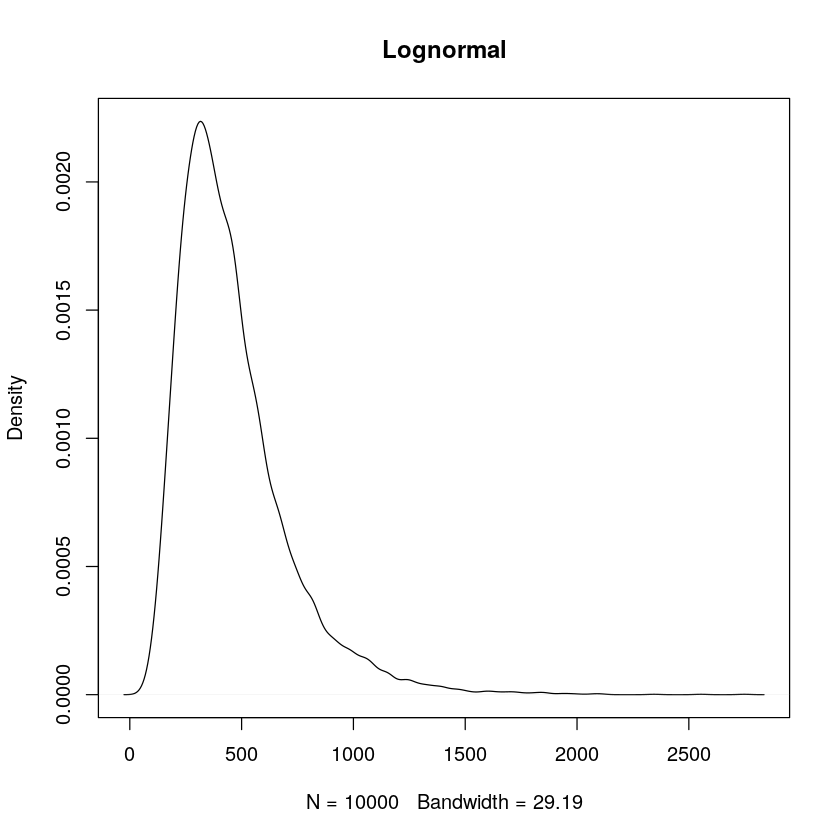

In [89]:
#plot(density(datos.clean[datos.clean$correct==1, 'rt']))
datos <- rlnorm(10000, meanlog = 6, sdlog=0.5)
plot(density(datos), main="Lognormal")

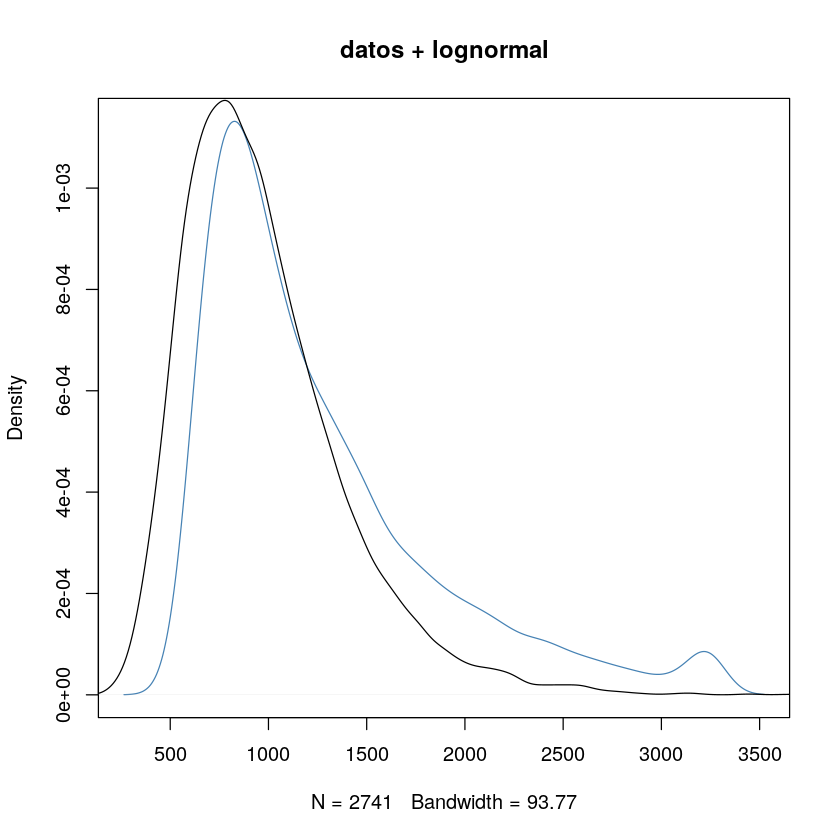

In [94]:
plot(density(rw$rt), col="steelblue", main="datos + lognormal")
#lines(density(datos.clean[, 'rt']), col='blue')
#lines(density(datos.clean[datos.clean$correct==1, 'rt']))
#lines(density(datos.clean[datos.clean$correct==0, 'rt']), col='red')
#gridx <- seq(-2,3500,1)
datos <- rlnorm(10000, meanlog = 6.8, sdlog=0.4)
lines(density(datos))

# Ejercicio 7

(avanzado). La **capacidad metaconitiva** de un participante puede definirse como la correspondencia entre la ***certeza de la respuesta*** y la ***confianza reportada***.

Una de las formas de medirla es usando una **curva ROC de tipo 2** en la que “hits” corresponde a reportar alta confianza en los trials correctos y baja confianza en los trials incorrectos.

Más detalles y código en el paper [How to measure metacognition](https://www.frontiersin.org/articles/10.3389/fnhum.2014.00443/full#T1).

Con los datos obtenidos de cada participante **medir el area bajo la curva ROC de tipo 2**.

Luego **hacer un histograma de los valores obtenidos**.

# Resolución:

## Limpieza de datos:

Para elegir cuántos valores descartar, visualicé el **promedio de las respuestas correctas** a medida que movía el punto de inicio.

A partir del resultado número 50 se observó una estabilización del mismo ($\approx 0.722$), por lo que se eligió como valor final.

In [19]:
datos <- read.csv('./datos.csv', header=TRUE, sep=",")

In [20]:
stability.thr <- 50
max.rt.thr  <- 5000
datos.clean <- datos[datos$trial >= stability.thr & datos$rt <= max.rt.thr, ]

In [21]:
head(datos.clean)

,subject,trial,dots_left,dots_right,correct,rt,confidence
50,1,50,50,60,TRUE,4056,1
51,1,51,50,58,TRUE,895,3
52,1,52,58,50,TRUE,1603,2
53,1,53,50,56,TRUE,979,3
54,1,54,50,56,TRUE,912,4
55,1,55,54,50,TRUE,922,4


## Generación de Curva ROC tipo 2

|**Type I decision**|**High confidence**|**Low confidence**|
|--|--|--|
|Correct|Type 2 hit (H2)|Type 2 miss (M2)|
|Incorrect|Type 2 false alarm (FA2)|Type 2 correct rejection (CR2)|

$$\text{Table 1. Classification of responses within type 2 signal detection theory.}$$

Para cada valor de confianza (6 en nuestro experimento), lo elijo como *threshold* que define frontera entre baja y alta confianza.

De esta forma, itero sobre cada uno, obteniendo así 6 valores distintos de
* **Hits de tipo 2** (`hi.2`): Proporción de **respuestas correctas con alta confianza**.
* **Falsas alarmas de tipo 2** (`fa.2`): Proporción de **respuestas incorrectas con alta confianza**.

Observar que agrego un **séptimo valor** que corresponde a alguno de las fronteras donde **todos** los valores de cofianza están por debajo o por encima de ella (me aseguro que el $(0,0)$ y el $(1,1)$ existan en la curva ROC2)

In [22]:
m <- length(unique(datos$confidence)) + 1
hi.2 <- rep(NA, m)
fa.2 <- rep(NA, m)
ROC.2 <- data.frame(c1=rep(NA, 2),c2=rep(NA, 2),c3=rep(NA, 2),
                    c4=rep(NA, 2),c5=rep(NA, 2),c6=rep(NA, 2),
                    c7=rep(NA, 2))

### 1. Primer caso:

Curva ROC2 generalizada **para todos los sujetos al mismo tiempo**, sin distinción (código más claro).

*Ver caso 2 y 3 para análisis individual por sujeto.*

In [39]:
# Para cada nivel de confianza divido entre baja y alta confianza
confi <- c('c1','c2','c3','c4','c5','c6','c7')
for(c in 1:6){
    hi.2[c] <- sum(datos.clean$confidence>=c & datos.clean$correct==T)/sum(datos.clean$correct==T)
    fa.2[c] <- sum(datos.clean$confidence>=c & datos.clean$correct==F)/sum(datos.clean$correct==F)
    ROC.2[1, confi[c]] <- hi.2[c]
    ROC.2[2, confi[c]] <- fa.2[c]
}
# Agrego el (0,0)
hi.2[7] <- 0
fa.2[7] <- 0
ROC.2[1, 'c7'] <- hi.2[7]
ROC.2[2, 'c7'] <- fa.2[7]

In [40]:
rownames(ROC.2) <- c('HI2', 'FA2')
ROC.2

,c1,c2,c3,c4,c5,c6,c7
HI2,1,0.9142649,0.7686976,0.5297337,0.3181321,0.11856987,0
FA2,1,0.8438697,0.6139847,0.3793103,0.1714559,0.04980843,0


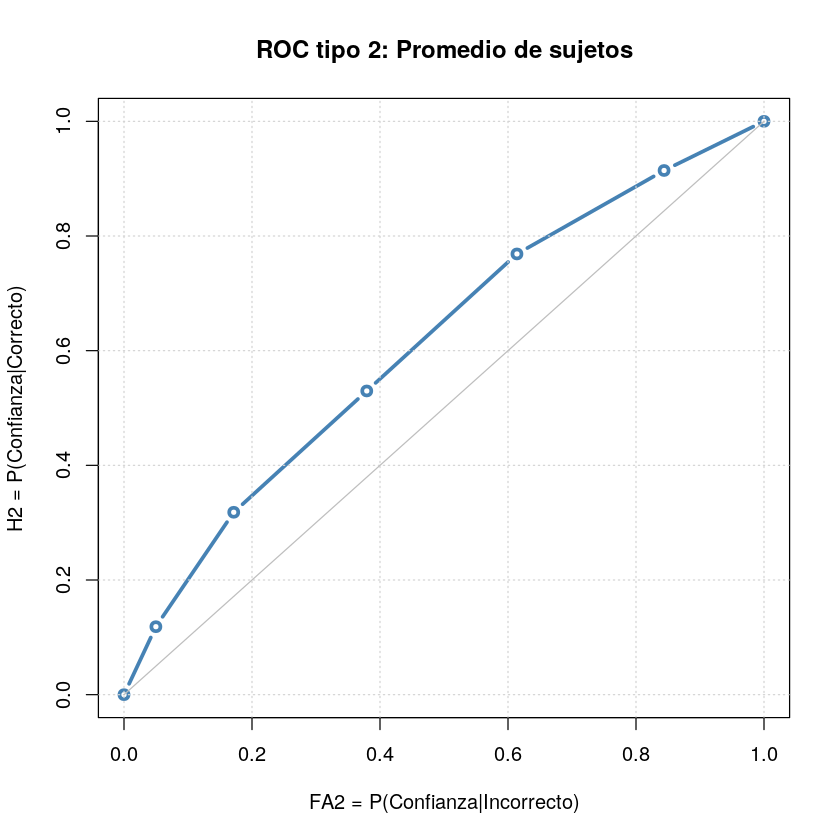

In [41]:
plot(fa.2, hi.2, type='b', lwd=3, col="steelblue", xlim=c(0,1), ylim=c(0,1),
     main="ROC tipo 2: Promedio de sujetos",
     xlab="FA2 = P(Confianza|Incorrecto)", ylab="H2 = P(Confianza|Correcto)")
grid()
lines(x=c(min(fa.2), max(fa.2)), y=c(min(hi.2),max(hi.2)), col='gray')

### 2. Segundo caso:

Curva ROC2 individualizada **para cada sujeto**.

Por simplicidad, muestro primeros 9.

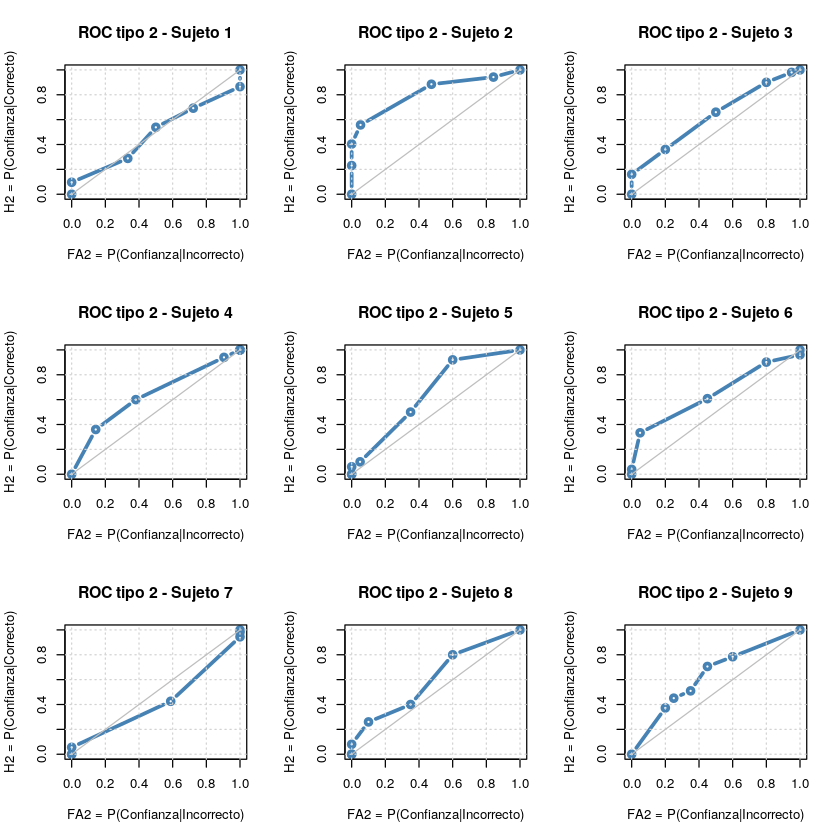

In [42]:
par(mfrow = c(3, 3))
for(i in 1:9){
    for(c in 1:6){
        hi.2[c] <- sum(datos.clean$subject    == i &
                       datos.clean$confidence >= c &
                       datos.clean$correct    == T) / sum(datos.clean$subject == i &
                                                          datos.clean$correct == T)
        fa.2[c] <- sum(datos.clean$subject    == i &
                       datos.clean$confidence >= c &
                       datos.clean$correct    == F) / sum(datos.clean$subject == i &
                                                          datos.clean$correct == F)
    }
    # Agrego (0,0)
    hi.2[7] <- 0
    fa.2[7] <- 0
    plot(fa.2, hi.2, type='b', lwd=3, col="steelblue", xlim=c(0,1), ylim=c(0,1),
         main=paste("ROC tipo 2 - Sujeto", i),
         xlab="FA2 = P(Confianza|Incorrecto)",
         ylab="H2 = P(Confianza|Correcto)")
    grid()
    lines(x=c(0,1), y=c(0,1), col='gray')
}

### 3. Tercer caso:

Curva ROC2 individualizada **para cada sujeto + promedio de sujetos**.

En este caso, la combinación de las dos visualizaciones anteriores en un mismo gráfico para todos los sujetos, da una idea más informativa de la media y la varianza de la capacidad metacognitiva de todos los sujetos que participaron en este experimento.

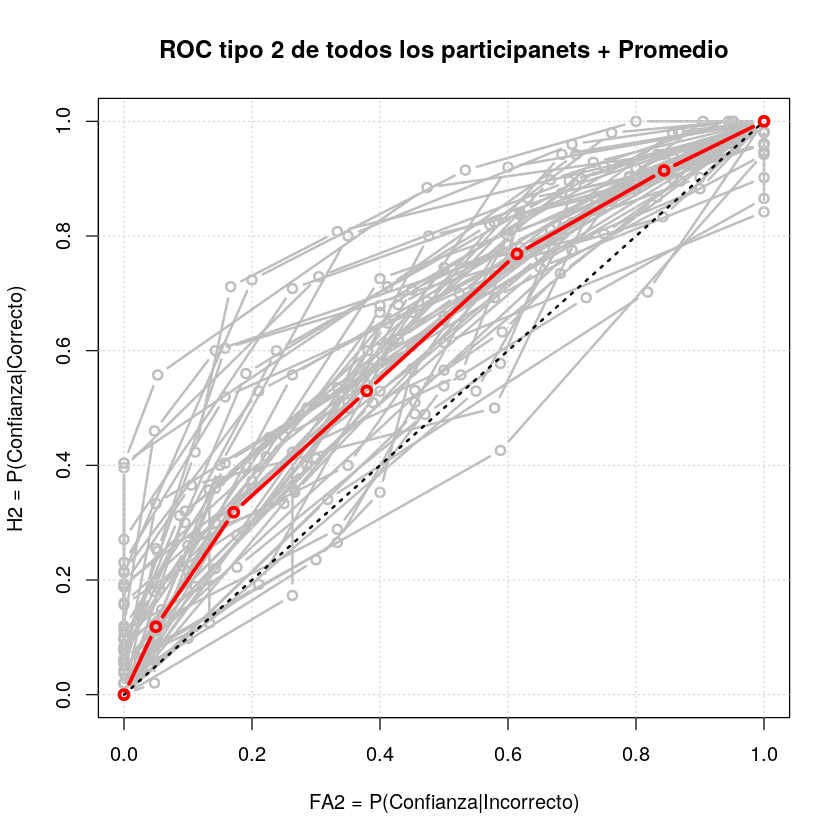

In [43]:
# Dummy plot
plot(x=0, y=0, xlim=c(0,1), ylim=c(0,1), col="white",
     main="ROC tipo 2 de todos los participanets + Promedio",
     xlab="FA2 = P(Confianza|Incorrecto)",
     ylab="H2 = P(Confianza|Correcto)")

# Itero sobre cada uno de los sujetos
for(i in 1:max(datos.clean$subject)){
    for(c in 1:6){
        hi.2[c] <- sum(datos.clean$subject    == i &
                       datos.clean$confidence >= c &
                       datos.clean$correct    == T) / sum(datos.clean$subject == i &
                                                          datos.clean$correct == T)
        fa.2[c] <- sum(datos.clean$subject    == i &
                       datos.clean$confidence >= c &
                       datos.clean$correct    == F) / sum(datos.clean$subject == i &
                                                          datos.clean$correct == F)
    }
    # Agrego (0,0)
    hi.2[7] <- 0
    fa.2[7] <- 0
    points(fa.2, hi.2, type='b', lwd=2, col="gray", xlim=c(0,1), ylim=c(0,1))
}
grid()
lines(x=c(0,1), y=c(0,1), lwd=2, col='black', lty=3)

# Computo la curva promedio de todos los sujetos
for(c in 1:6){
    hi.2[c] <- sum(datos.clean$confidence>=c & datos.clean$correct==T)/sum(datos.clean$correct==T)
    fa.2[c] <- sum(datos.clean$confidence>=c & datos.clean$correct==F)/sum(datos.clean$correct==F)
}
# Agrego (0,0)
hi.2[7] <- 0
fa.2[7] <- 0
points(fa.2, hi.2, type='b', lwd=3, col="red", xlim=c(0,1), ylim=c(0,1))

## Área bajo la curva

Para calcular el área bajo la curva, puedo sumar el área de los distintos trapezoides que componen el area encerrada bajo la curva ROC de tipo 2, como se observa a continuación:

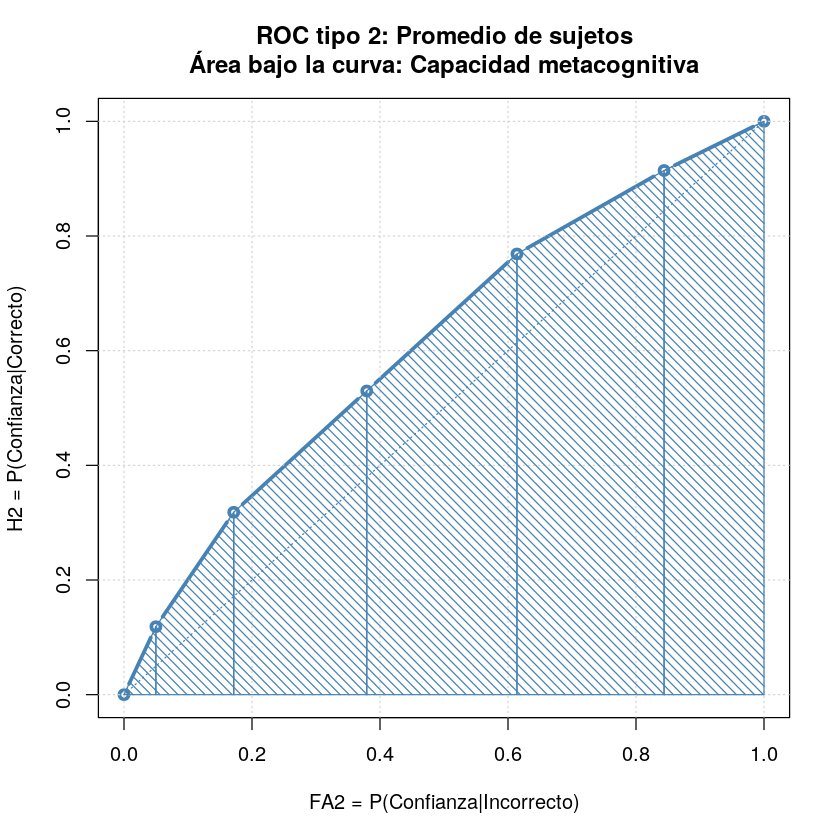

In [44]:
plot(fa.2, hi.2, type='b', lwd=3, col="steelblue", xlim=c(0,1), ylim=c(0,1),
     main="ROC tipo 2: Promedio de sujetos\nÁrea bajo la curva: Capacidad metacognitiva",
     xlab="FA2 = P(Confianza|Incorrecto)", ylab="H2 = P(Confianza|Correcto)")
grid()
lines(x=c(min(fa.2), max(fa.2)), y=c(min(hi.2),max(hi.2)), col='steelblue', lty=3)
polygon(c(fa.2[7:6], fa.2[6:7]), c(hi.2[7:6],0,0), density =20, angle=-45, col="steelblue")
polygon(c(fa.2[6:5], fa.2[5:6]), c(hi.2[6:5],0,0), density =20, angle=-45, col="steelblue")
polygon(c(fa.2[5:4], fa.2[4:5]), c(hi.2[5:4],0,0), density =20, angle=-45, col="steelblue")
polygon(c(fa.2[4:3], fa.2[3:4]), c(hi.2[4:3],0,0), density =20, angle=-45, col="steelblue")
polygon(c(fa.2[3:2], fa.2[2:3]), c(hi.2[3:2],0,0), density =20, angle=-45, col="steelblue")
polygon(c(fa.2[2:1], fa.2[1:2]), c(hi.2[2:1],0,0), density =20, angle=-45, col="steelblue")

Usando trigonometría básica, podemos calcular el área de cada trapezoide como:

$$\large A_{\text{trape}} = \frac{a+b}{2}h$$

Doned $a$ y $b$ representan las bases paralelas del trapezoide (en nuestro caso, verticales), y $h$ la altura o distancia perpendicular entre los mismos (en nuestro caso, horizontal)

In [45]:
getROCArea <- function(fa.2, hi.2){
    # Calculo y acumulo area de los trapezoides
    # A_tra = (a+b)/2 * h
    area <- 0
    for(i in 7:2){
        height <- fa.2[i-1] - fa.2[i]
        base.a <- hi.2[i]
        base.b <- hi.2[i-1]
        area <- area + (base.a+base.b)/2 * height
    }
    return(area)
}

#### Área del promedio de curvas visualizado arriba:

In [46]:
getROCArea(fa.2, hi.2)

[1] 0.6128666

#### Calculo las areas de las curvas individuales de cada participante

In [47]:
n <- length(unique(datos.clean$subject))
areas <- rep(NA, n)
for(i in 1:max(datos.clean$subject)){
    hi.2[c] <- sum(datos.clean$subject    == i &
                   datos.clean$confidence >= c &
                   datos.clean$correct    == T) / sum(datos.clean$subject == i &
                                                      datos.clean$correct == T)
    fa.2[c] <- sum(datos.clean$subject    == i &
                   datos.clean$confidence >= c &
                   datos.clean$correct    == F) / sum(datos.clean$subject == i &
                                                      datos.clean$correct == F)
    areas[i] <- getROCArea(fa.2, hi.2)
}

#### Promedio de áreas de todas las curvas

Notar que es muy similar al area de la curva promedio de arriba

In [48]:
mean(areas)

[1] 0.6134019

## Histograma de áreas bajo las curvas ROC 2

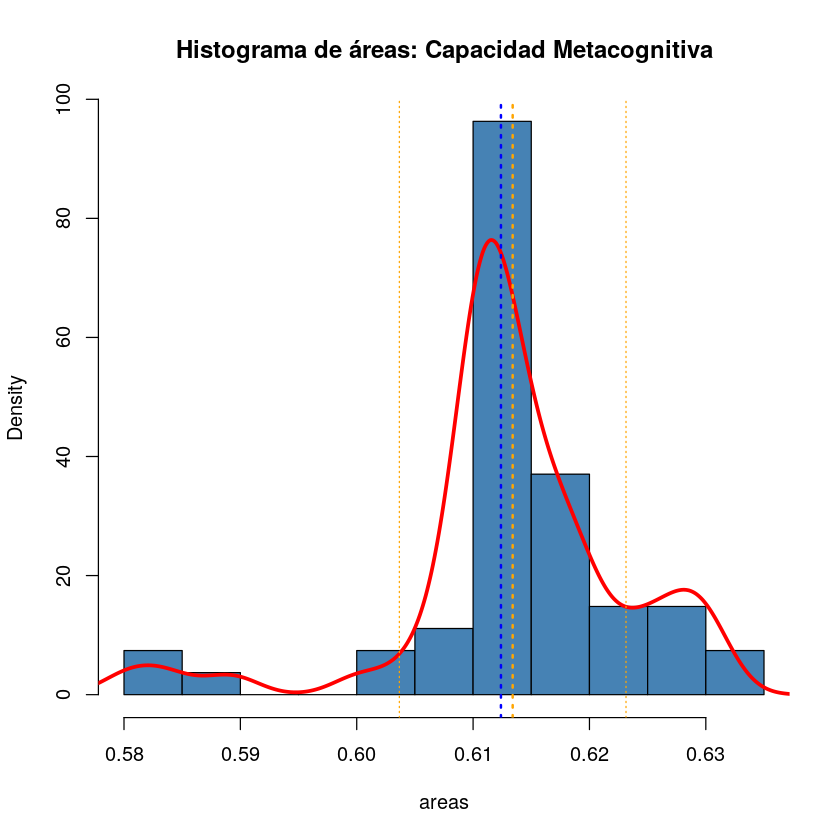

In [49]:
areas <- rep(NA, n)
for(i in 1:n){
    hi.2[c] <- sum(datos.clean$subject    == i &
                   datos.clean$confidence >= c &
                   datos.clean$correct    == T) / sum(datos.clean$subject == i &
                                                      datos.clean$correct == T)
    fa.2[c] <- sum(datos.clean$subject    == i &
                   datos.clean$confidence >= c &
                   datos.clean$correct    == F) / sum(datos.clean$subject == i &
                                                      datos.clean$correct == F)
    areas[i] <- getROCArea(fa.2, hi.2)
}
hist(areas, breaks=10, col="steelblue", prob=T, main="Histograma de áreas: Capacidad Metacognitiva")
lines(density(areas), col="red", lwd=3)
abline(v=mean(areas), col="orange", lwd=2, lty=3)
abline(v=median(areas), col="blue", lwd=2, lty=3)
abline(v=mean(areas)+sd(areas), col="orange", lty=3)
abline(v=mean(areas)-sd(areas), col="orange", lty=3)

Se observa una gran concentración de la masa del histograma entre los valores 0.60 y 0.63, con muy baja desviación.

Ésto indica que los participantes poseen capacidades metacognitivas "correctamente calibradas", es decir, púeden diferenciar cuándo no tienen certeza sobre una respuesta dada, y cuando sí.

$fin$

In [34]:
mean(areas)

[1] 0.6134019

In [35]:
areas[areas < 0.5]

numeric(0)

In [36]:
#datos.clean[datos$subject==1, 'correct']
unique(datos.clean[datos$subject==1, 'confidence'])

[1] 1 3 2 4 5 6

In [37]:
#Matlab code for calculating the area under the type 2 ROC.

type2roc <- function(correct, conf, Nratings){
    # % function auroc2 = type2roc(correct, conf, Nratings)
    # %
    # % Calculate area under type 2 ROC
    # % 
    # % correct - vector of 1 x ntrials, 0 for error, 1 for correct
    # % conf - vector of 1 x ntrials of confidence ratings taking values 1:Nratings
    # % Nratings - how many confidence levels available

    i <- Nratings + 1
    H2  <- rep(NA, Nratings)
    FA2 <- rep(NA, Nratings)
    for (c in 1:Nratings){
        H2[i-1]  <- sum(conf == c & correct)  + 0.5
        FA2[i-1] <- sum(conf == c & !correct) + 0.5
        i <- i-1
    }

    H2  <- H2  / sum(H2)
    FA2 <- FA2 / sum(FA2)
    cum_H2  <- c(0, cumsum(H2))
    cum_FA2 <- c(0, cumsum(FA2))

    i <- 1
    k <- rep(NA, Nratings)
    for (c in 1:Nratings){
            k[i] <- (cum_H2[c+1] - cum_FA2[c])^2 - (cum_H2[c] - cum_FA2[c+1])^2;
            i <- i+1;
    }
    auroc2 <- 0.5 + 0.25*sum(k)
    return(auroc2)
}

In [38]:
type2roc(datos.clean[, 'correct'], datos.clean[, 'confidence'], 6)

[1] 0.6125717